**konteks permasalahan yang hendak dianalisis**
faktor-faktor apa yang mempengaruhi penjualan bulanan dan prediksi untuk penjualan di masa depan.
1.   Bagaimana tren penjualan yang ada ?
2.   Bagaimana performa produk yang di jual ?
3.   Bagaimana poternsi area mempengaruhi penjualan ?

Tujuan analisis ini adalah untuk mengidentifikasi tren penjualan, performa produk, dan potensi area untuk peningkatan.

**Menyiapkan Library**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Membaca data dari file CSV**

In [5]:
data = pd.read_csv('SaaS-Sales.csv')

**Pembersihan data** : Menghapus data duplikat, menangani nilai yang hilang, dan memastikan konsistensi data.

In [6]:
data.drop_duplicates(inplace=True)
data.fillna(0, inplace=True)

**Visualisasi data** : membuat grafik yang membantu memahami distribusi dan tren data.
Grafik bar yang menunjukkan penjualan berdasarkan wilayah dapat membantu mengidentifikasi wilayah dengan penjualan tertinggi dan terendah. Perhatikan perbedaan signifikan antara wilayah untuk menentukan area yang memerlukan perhatian lebih.

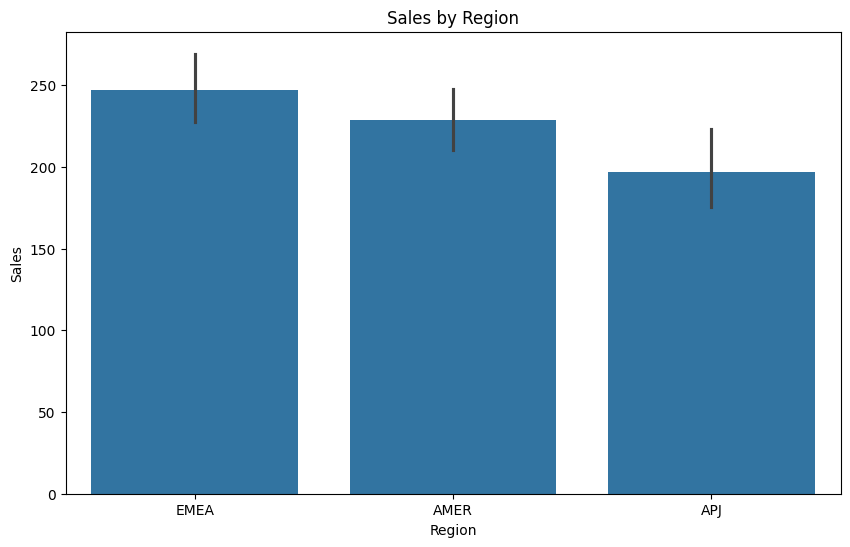

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=data)
plt.title('Sales by Region')
plt.show()

**Analisis statistik** : Menggunakan statistik deskriptif untuk menganalisis performa penjualan

In [8]:
sales_summary = data.groupby('Region')['Sales'].describe()
print(sales_summary)

         count        mean         std    min     25%     50%     75%  \
Region                                                                  
AMER    3665.0  228.608350  560.907190  0.990  19.194  60.340  212.94   
APJ     2110.0  196.902484  585.530226  0.444  13.394  44.430  185.88   
EMEA    4219.0  247.425223  688.971663  0.852  17.691  53.424  214.80   

             max  
Region            
AMER    13999.96  
APJ     17499.95  
EMEA    22638.48  


**Model prediktif** : Membangun model prediktif untuk memproyeksikan penjualan di masa depan berdasarkan data historis.

In [9]:
from sklearn.linear_model import LinearRegression

**Menggunakan fitur untuk prediksi**

In [10]:
data['Date'] = pd.to_datetime(data['Order Date'])
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())
X = data[['Date_ordinal']]
y = data['Sales']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

**Prediksi penjualan** : Grafik prediksi penjualan untuk 30 hari ke depan dapat memberikan gambaran tentang tren penjualan yang diharapkan. Jika prediksi menunjukkan peningkatan atau penurunan, maka dapat direncanakan strategi pemasaran atau penjualan yang sesuai.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


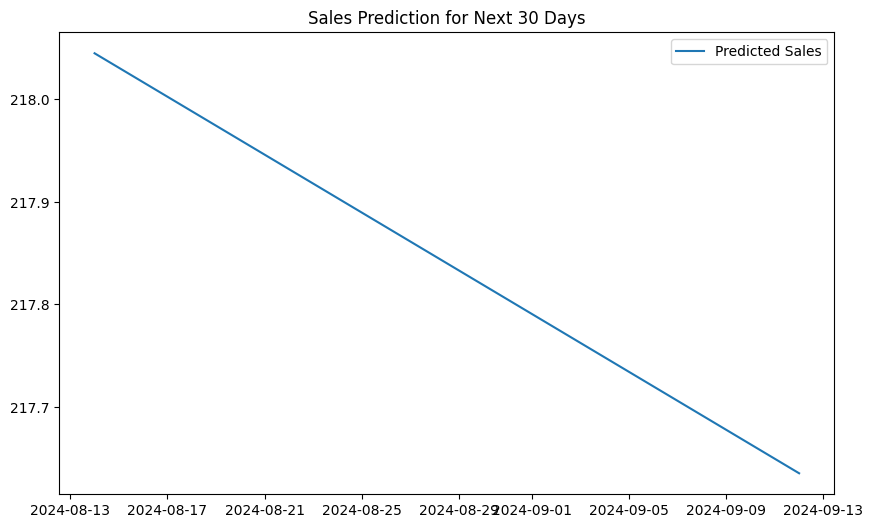

In [11]:
future_dates = pd.date_range(start='2024-08-14', periods=30)
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
predictions = model.predict(future_dates_ordinal)

plt.figure(figsize=(10, 6))
plt.plot(future_dates, predictions, label='Predicted Sales')
plt.title('Sales Prediction for Next 30 Days')
plt.legend()
plt.show()